In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1"

for root, dirs, files in os.walk(dataset_path):
    print(f"Directory: {root}")
    print(f"Subdirectories: {dirs}")
    print(f"Files: {files}")
    print("-" * 50)


In [8]:
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST"


In [9]:
import os
import shutil
import random

def create_subset(source_path, dest_path, subset_ratio=0.5):
    # Ensure the destination directory exists
    os.makedirs(dest_path, exist_ok=True)

    for category in os.listdir(source_path):
        category_path = os.path.join(source_path, category)
        if not os.path.isdir(category_path):
            continue

        # Destination category directory
        dest_category_path = os.path.join(dest_path, category)
        os.makedirs(dest_category_path, exist_ok=True)

        # Get all files in the category
        files = os.listdir(category_path)
        random.shuffle(files)

        # Select a subset
        subset_size = int(len(files) * subset_ratio)
        subset_files = files[:subset_size]

        # Copy the subset files
        for file in subset_files:
            src_file = os.path.join(category_path, file)
            dest_file = os.path.join(dest_category_path, file)
            shutil.copy(src_file, dest_file)

# Paths for subset
subset_train_path = "dataset/TRAIN_SUBSET"
subset_test_path = "dataset/TEST_SUBSET"
import os
import shutil
import random

def create_subset(source_path, dest_path, subset_ratio=0.5):
    # Ensure the destination directory exists
    os.makedirs(dest_path, exist_ok=True)

    for category in os.listdir(source_path):
        category_path = os.path.join(source_path, category)
        if not os.path.isdir(category_path):
            continue

        # Destination category directory
        dest_category_path = os.path.join(dest_path, category)
        os.makedirs(dest_category_path, exist_ok=True)

        # Get all files in the category
        files = os.listdir(category_path)
        random.shuffle(files)

        # Select a subset
        subset_size = int(len(files) * subset_ratio)
        subset_files = files[:subset_size]

        # Copy the subset files
        for file in subset_files:
            src_file = os.path.join(category_path, file)
            dest_file = os.path.join(dest_category_path, file)
            shutil.copy(src_file, dest_file)

# Paths for subset
train_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TRAIN"
test_path = "/root/.cache/kagglehub/datasets/techsash/waste-classification-data/versions/1/dataset/DATASET/TEST"
subset_train_path = "dataset/TRAIN_SUBSET"
subset_test_path = "dataset/TEST_SUBSET"

# Create subsets
create_subset(train_path, subset_train_path, subset_ratio=0.5)
create_subset(test_path, subset_test_path, subset_ratio=0.5)

print("Subset created successfully!")

# Create subsets
create_subset(train_path, subset_train_path, subset_ratio=0.5)
create_subset(test_path, subset_test_path, subset_ratio=0.5)

print("Subset created successfully!")


Subset created successfully!
Subset created successfully!


In [11]:
for root, dirs, files in os.walk(subset_test_path):
    print(f"Directory: {root}")
    print(f"Number of files: {len(files)}")
    print("-" * 50)


Directory: dataset/TEST_SUBSET
Number of files: 0
--------------------------------------------------
Directory: dataset/TEST_SUBSET/R
Number of files: 840
--------------------------------------------------
Directory: dataset/TEST_SUBSET/O
Number of files: 1053
--------------------------------------------------


100%|██████████| 9455/9455 [00:06<00:00, 1460.48it/s]


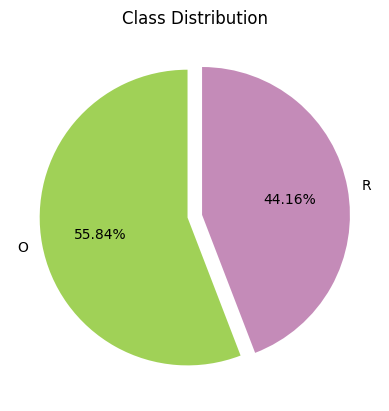

In [13]:


# Define paths for the smaller dataset
train_path = "dataset/TRAIN_SUBSET"
test_path = "dataset/TEST_SUBSET"


# Data preprocessing and visualization
x_data = []
y_data = []

# Reading images and labels
for category in glob(train_path + "/*"):
    label = category.split("/")[-1]  # Extract label (folder name)
    for file in tqdm(glob(category + "/*")):
        img_array = cv2.imread(file)
        if img_array is not None:  # Ensure image is successfully read
            img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
            img_array = cv2.resize(img_array, (150, 150))  # Resize to (150x150)
            x_data.append(img_array)
            y_data.append(label)

# Converting to a DataFrame
data = pd.DataFrame({"image": x_data, "label": y_data})

# Visualizing class distribution
colors = ['#a0d157', '#c48bb8']
plt.pie(
    data['label'].value_counts(),
    labels=data['label'].value_counts().index,
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.05] * len(data['label'].value_counts()),
)
plt.title("Class Distribution")
plt.show()


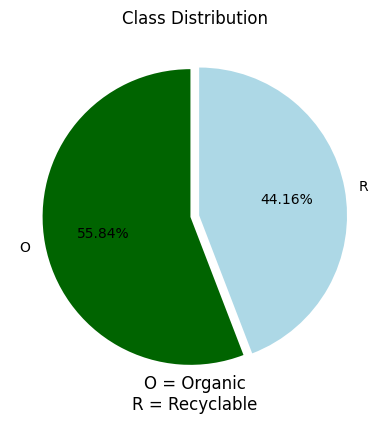

In [19]:
# Visualizing class distribution with dark green and light blue
colors = ['#006400', '#ADD8E6']  # Dark green and light blue

plt.pie(
    data['label'].value_counts(),
    labels=data['label'].value_counts().index,
    autopct='%0.2f%%',
    colors=colors,
    startangle=90,
    explode=[0.03] * len(data['label'].value_counts()),
)
# Adding a text annotation to explain the labels
plt.text(
    0, -1.2, "O = Organic\nR = Recyclable", ha='center', va='center', fontsize=12, color='black'
)
plt.title("Class Distribution")
plt.show()
